In [25]:
# Kaggle dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [26]:
import os
import torch
import torch.nn as nn
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Check if running in Google Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# If not in Colab, use tkinter to open file dialog
if not IN_COLAB:
    from tkinter import Tk
    from tkinter.filedialog import askopenfilename

# File upload or loading depending on environment
if IN_COLAB:
    print("Running in Google Colab, using files.upload()")
    uploaded = files.upload()
    filename = next(iter(uploaded))  # Get the uploaded file name
    
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("Not running in Google Colab, opening file dialog.")
    
    # Hide the root window
    root = Tk()
    root.withdraw()  # Hide the root window (it will only show the file dialog)
    
    # Open file dialog
    filename = askopenfilename(title="Select a file", filetypes=[("All files", "*.*")])
    
    if filename:
        print(f"Selected file: {filename}")
    else:
        print("No file selected.")

# Example of using the uploaded or provided file
if filename and os.path.exists(filename):
    print(f"File {filename} found and ready to process.")
else:
    print(f"File {filename} not found.")

Not running in Google Colab, opening file dialog.
Selected file: C:/Users/khang/Desktop/PyTorch Tutorial/Kaggle Credit Card Fraud/kaggle.json
File C:/Users/khang/Desktop/PyTorch Tutorial/Kaggle Credit Card Fraud/kaggle.json found and ready to process.


In [28]:
!kaggle datasets download -d mlg-ulb/creditcardfraud -p ./datasets/

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0




  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|▏         | 1.00M/66.0M [00:00<00:07, 9.25MB/s]
  5%|▍         | 3.00M/66.0M [00:00<00:04, 15.4MB/s]
 14%|█▎        | 9.00M/66.0M [00:00<00:01, 33.2MB/s]
 21%|██        | 14.0M/66.0M [00:00<00:01, 36.9MB/s]
 29%|██▉       | 19.0M/66.0M [00:00<00:01, 39.4MB/s]
 36%|███▋      | 24.0M/66.0M [00:00<00:01, 41.2MB/s]
 44%|████▍     | 29.0M/66.0M [00:00<00:00, 42.4MB/s]
 52%|█████▏    | 34.0M/66.0M [00:00<00:00, 42.9MB/s]
 59%|█████▉    | 39.0M/66.0M [00:01<00:00, 43.6MB/s]
 67%|██████▋   | 44.0M/66.0M [00:01<00:00, 43.1MB/s]
 74%|███████▍  | 49.0M/66.0M [00:01<00:00, 43.8MB/s]
 82%|████████▏ | 54.0M/66.0M [00:01<00:00, 43.2MB/s]
 89%|████████▉ | 59.0M/66.0M [00:01<00:00, 42.1MB/s]
 97%|█████████▋| 64.0M/66.0M [00:01<00:00, 43.3MB/s]
100%|██████████| 66.0M/66.0M [00:01<00:00, 40.4MB/s]


In [29]:
# Define the path to your zip file
zip_file_path = './datasets/creditcardfraud.zip'
extracted_path = './datasets/extracted/'

# Check if the file exists
if os.path.exists(zip_file_path):
    # Open the zip file in read mode
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents of the zip file to a directory
        zip_ref.extractall(extracted_path)
        print(f'Files extracted to: {extracted_path}')
else:
    print("Zip file does not exist.")

Files extracted to: ./datasets/extracted/


In [30]:
# Assuming there's a CSV file in the extracted folder
csv_file_path = os.path.join(extracted_path, 'creditcard.csv')

# Load the CSV into a pandas DataFrame
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print(df.head())  # Print the first 5 rows of the DataFrame
else:
    print("CSV file not found.")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [31]:
df.shape

(284807, 31)

In [32]:
# Separate into X and y
X = df.drop(columns=['Time','Class'])
y = df['Class']

# Check the shape of X and y to ensure they're correct
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (284807, 29)
Labels shape: (284807,)


In [33]:
# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the DataFrames to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)

# Check the shapes of the tensors
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: torch.Size([227845, 29])
X_test shape: torch.Size([56962, 29])
y_train shape: torch.Size([227845])
y_test shape: torch.Size([56962])


In [34]:
# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'You are using {device}.')

You are using cuda.


In [35]:
# Move tensors to the appropriate device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Verify the device of the tensors
print(f"X_train is on: {X_train.device}")
print(f"X_test is on: {X_test.device}")
print(f"y_train is on: {y_train.device}")
print(f"y_test is on: {y_test.device}")

X_train is on: cuda:0
X_test is on: cuda:0
y_train is on: cuda:0
y_test is on: cuda:0


In [36]:
# Check the distribution of the target variable y
class_distribution = y.value_counts()

print(class_distribution)

Class
0    284315
1       492
Name: count, dtype: int64


This disproportionately non-fraud.

Oversampling the minority class
*   Oversampling increases the number of fraud cases in your training data by duplicating or synthesizing new fraud examples. This balances the class distribution and gives the model more opportunities to learn from fraudulent patterns.


Undersampling the majority class
*   Decreases training time and computational costs. Reduces the risk of overfitting since the model sees more balanced classes.


In [37]:
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler object
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train, y_train = ros.fit_resample(X_train.cpu(), y_train.cpu())

# Convert the resampled data back to PyTorch tensors and move to device
X_train = torch.tensor(X_train, dtype=torch.float).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Check the distribution of the target variable y
y_train_numpy = y_train.cpu().numpy()

# Get unique values and their counts
unique, counts = np.unique(y_train_numpy, return_counts=True)

print(unique, counts)

X_train shape: torch.Size([454902, 29])
y_train shape: torch.Size([454902])
[0. 1.] [227451 227451]


In [38]:
# Build model

class CC_Fraud_Model(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=10):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features) # Output should be 1 for binary classification
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

input_features = X_train.shape[1]
print(input_features)
# unique_classes = torch.unique(y_test) # This is causing the issue.
# unique_classes.numel() # You want 1 output for binary classification
# print(unique_classes.numel())

# Create instance of model
#Change the output_features to 1 for binary classification
model = CC_Fraud_Model(input_features=X_test.shape[1],output_features=1,hidden_units=20)
model.to(device)
print(model)
print(f"Model is on: {next(model.parameters()).device}")

29
CC_Fraud_Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=29, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)
Model is on: cuda:0


In [39]:
# Create loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

In [40]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [41]:
torch.manual_seed(42)
epochs = 1000
epoch_print = epochs/10

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epoch_count = []

for epoch in range(epochs):

  # Put model in training mode
  model.train()

  # 1. Forward pass
  y_logits = model(X_train).squeeze() # squeeze to remove extra dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # ensure y_pred and y_train have the same shape

  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train) # y_logits and y_train should now have compatible shapes
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing

  # Put model into evaluation mode
  model.eval()

  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test).squeeze() # squeeze to remove extra dimension
      test_pred = torch.round(torch.sigmoid(test_logits))# ensure test_pred and y_test have the same shape
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)# test_logits and y_test should now have compatible shapes
      test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)


  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    train_acc_values.append(acc)
    test_acc_values.append(test_acc)
  if epoch % epoch_print == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.60205, Accuracy: 49.89% | Test Loss: 2.2299, Test Acc: 0.21%
Epoch: 100 | Loss: 0.57878, Accuracy: 50.04% | Test Loss: 0.68147, Test Acc: 35.79%
Epoch: 200 | Loss: 0.53058, Accuracy: 52.39% | Test Loss: 0.63174, Test Acc: 56.82%
Epoch: 300 | Loss: 0.49238, Accuracy: 59.81% | Test Loss: 0.60249, Test Acc: 68.36%
Epoch: 400 | Loss: 0.46169, Accuracy: 70.30% | Test Loss: 0.58235, Test Acc: 79.36%
Epoch: 500 | Loss: 0.43678, Accuracy: 79.87% | Test Loss: 0.54743, Test Acc: 87.53%
Epoch: 600 | Loss: 0.41784, Accuracy: 85.03% | Test Loss: 0.53439, Test Acc: 91.99%
Epoch: 700 | Loss: 0.41671, Accuracy: 84.61% | Test Loss: 0.49671, Test Acc: 94.96%
Epoch: 800 | Loss: 0.38449, Accuracy: 90.48% | Test Loss: 0.493, Test Acc: 95.88%
Epoch: 900 | Loss: 0.37514, Accuracy: 90.59% | Test Loss: 0.45908, Test Acc: 96.80%


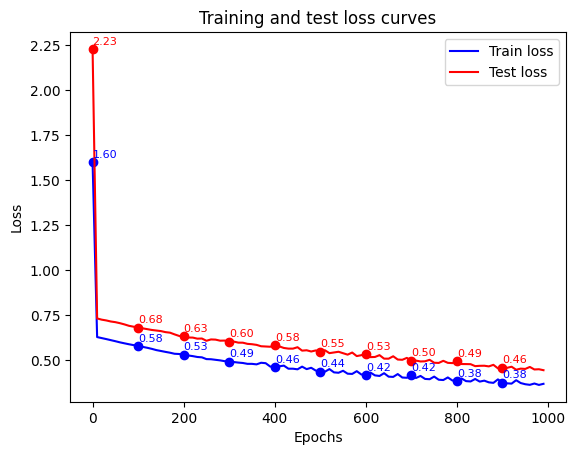

In [42]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss", color='b')
plt.plot(epoch_count, test_loss_values, label="Test loss", color='r')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Label points that fall on hundreds for train loss and add dots
for i, (x, y) in enumerate(zip(epoch_count, train_loss_values)):
    if x % 100 == 0:  # Only label points that are multiples of 100 on x-axis
        plt.text(x, y + 0.025, f'{y:.2f}', color='b', fontsize=8)  # Label the train loss
        plt.scatter(x, y, color='b')  # Add a dot at the labeled point

# Label points that fall on hundreds for test loss and add dots
for i, (x, y) in enumerate(zip(epoch_count, test_loss_values)):
    if x % 100 == 0:  # Only label points that are multiples of 100 on x-axis
        plt.text(x, y + 0.025, f'{y:.2f}', color='r', fontsize=8)  # Label above the test loss
        plt.scatter(x, y, color='r')  # Add a dot at the labeled point

plt.show()


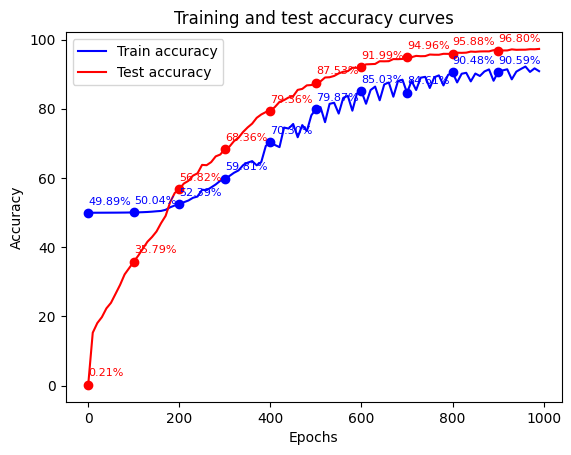

In [43]:
# Plot the accuracy curves
plt.plot(epoch_count, train_acc_values, label="Train accuracy", color='b')
plt.plot(epoch_count, test_acc_values, label="Test accuracy", color='r')
plt.title("Training and test accuracy curves")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Label points that fall on hundreds
for i, (x, y) in enumerate(zip(epoch_count, test_acc_values)):
    if x % 100 == 0:  # Only label points that are multiples of 100 on x-axis
        plt.text(x, y + 2.5, f'{y:.2f}%', color='r', fontsize=8)  # Label the test accuracy
        plt.scatter(x, y, color='r')  # Add a dot at the labeled point

for i, (x, y) in enumerate(zip(epoch_count, train_acc_values)):
    if x % 100 == 0:  # Only label points that are multiples of 100 on x-axis
        plt.text(x, y + 2.5, f'{y:.2f}%', color='b', fontsize=8)  # Label the train accuracy
        plt.scatter(x, y, color='b')  # Add a dot at the labeled point

plt.show()

In [44]:
print(f"Test accuracy: {test_acc_values[-1]:.2f}%")

Test accuracy: 97.28%


In [45]:
# Save the model's state_dict to a file
torch.save(model.state_dict(), 'cc_fraud_model.pth')

In [46]:
loaded_model = CC_Fraud_Model(input_features=X_test.shape[1],output_features=1,hidden_units=20)

In [47]:
loaded_model.load_state_dict(torch.load('cc_fraud_model.pth'))

<All keys matched successfully>

In [48]:
from operator import is_

# Collect the test data with fraud
fraud_index = torch.where(y_test == 1)[0]

# Get a random index from fraud_index
random_fraud_index = random.choice(fraud_index.tolist())

# Send model to device
loaded_model.to(device)

# Use fraud index in model
loaded_model.eval()
with torch.inference_mode():
    # Forward pass
    y_logits = loaded_model(X_test[random_fraud_index])
    y_pred = torch.round(torch.sigmoid(y_logits))
    if y_test[random_fraud_index] == 1:
        true_fraud_value = "Fraud"
    else:
        true_fraud_value = "Not Fraud"

    if y_pred == 1:
        pre_fraud_value = "Fraud"
    else:
        pre_fraud_value = "Not Fraud"
    print(f'Test index: {random_fraud_index}, Prediction: {pre_fraud_value}, Truth: {true_fraud_value}')

Test index: 27885, Prediction: Fraud, Truth: Fraud
